# Import packages

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.mplot3d import Axes3D

# Read data from raw_data folder

## "immune_clinical" data set

In [15]:
import pandas as pd
immune_clinical = pd.read_csv("../raw_data/immune_clinical.csv")

In [6]:
immune_clinical.shape

(442, 62)

In [7]:
immune_clinical.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,orr1,dpr1,ets_cat,SYNCH_META,PRIMARY_RES,RADIOVORHER,LK,AP,CTX_ADJ,filter_$
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,1.0,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,1.0
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,1.0,NaN,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,1.0,NaN,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.0,NaN,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0


In [8]:
immune_clinical.columns

Index(['pat_nr', 'B cells naive', 'B cells memory', 'Plasma cells',
       'T cells CD8', 'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Mast cells resting',
       'Mast cells activated', 'Eosinophils', 'Neutrophils', 'P-value',
       'Correlation', 'RMSE', 'study', 'CET1_REST0', 'arm', 'sex', 'age',
       'ecog', 'skin_rash', 'MOL_SG', 'RNA_Probe', 'predictedCMS',
       'nearestCMS', 'detaiL_primloc', 'primeloc_side', 'liver', 'lung',
       'LKMETS', 'PERITONEAL', 'other', 'liver_only', 'no_organs', 'secresec',
       'pfs', 'pfs_time_mo', 'os', 'os_time_mo', 'bor1', 'orr1', 'dpr1',
       'ets_cat', 'SYNCH_META', 'PRIMARY_RES', 'RADIOVORHER', 'LK', 'AP',
       'CTX

In [190]:
(immune_clinical["CET1_REST0"]== 1).sum()

218

In [192]:
(immune_clinical["arm"] == 2).sum()

224

## "cetux" data file of cetuximab arm of study, reduced columns


In [16]:
cetux = pd.read_csv("../raw_data/cetux.csv")
cetux.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,sex,age,skin_rash
0,9,0.067346,0.000000,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.071104,0.000000,0.0,0.188876,0.000000,0.074924,0.004,1.0,61.0,1.0
1,10,0.000000,0.000000,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.000000,0.009239,0.0,0.134230,0.000000,0.070198,0.024,1.0,74.0,1.0
2,12,0.065798,0.000000,0.118399,0.111458,0.0,0.281396,0.000000,0.000000,0.069544,...,0.024802,0.000000,0.0,0.086495,0.032828,0.051155,0.002,1.0,73.0,1.0
3,15,0.010223,0.000000,0.186072,0.193724,0.0,0.283032,0.000000,0.000000,0.144012,...,0.000000,0.000000,0.0,0.081489,0.000000,0.004522,0.034,1.0,68.0,1.0
4,16,0.000000,0.013582,0.056297,0.080645,0.0,0.336947,0.000000,0.035983,0.057663,...,0.079572,0.010232,0.0,0.045427,0.000000,0.095906,0.022,1.0,42.0,1.0


## "bevacizumab" data file of bevacizumab arm, reduced columns

In [40]:
bevacizumab = pd.read_csv("../raw_data/bevacizumab.csv")
bevacizumab.shape

(224, 27)

# Data exploration

## From cetux create dataframe X and target y

In [23]:
X = cetux.iloc[:,1:23]
X

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,0.067346,0.000000,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,0.094723,...,0.000000,0.012340,0.061996,0.019745,0.071104,0.000000,0.000000,0.188876,0.000000,0.074924
1,0.000000,0.000000,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,0.000000,...,0.031279,0.000000,0.000000,0.065631,0.000000,0.009239,0.000000,0.134230,0.000000,0.070198
2,0.065798,0.000000,0.118399,0.111458,0.0,0.281396,0.000000,0.000000,0.069544,0.000000,...,0.000000,0.008250,0.121340,0.005364,0.024802,0.000000,0.000000,0.086495,0.032828,0.051155
3,0.010223,0.000000,0.186072,0.193724,0.0,0.283032,0.000000,0.000000,0.144012,0.000000,...,0.007435,0.000000,0.018321,0.014802,0.000000,0.000000,0.000000,0.081489,0.000000,0.004522
4,0.000000,0.013582,0.056297,0.080645,0.0,0.336947,0.000000,0.035983,0.057663,0.000000,...,0.000000,0.011481,0.000000,0.167292,0.079572,0.010232,0.000000,0.045427,0.000000,0.095906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.000000,0.000000,0.214848,0.068667,0.0,0.240325,0.000000,0.000000,0.016270,0.000000,...,0.002291,0.029856,0.000000,0.125876,0.000000,0.015242,0.042989,0.073584,0.000000,0.111343
214,0.042629,0.000000,0.159207,0.088503,0.0,0.094924,0.000000,0.064158,0.032181,0.000000,...,0.027582,0.059096,0.044513,0.000147,0.012462,0.000000,0.000000,0.117259,0.000000,0.150289
215,0.062810,0.000000,0.165863,0.111992,0.0,0.242714,0.000000,0.000000,0.015493,0.000000,...,0.009641,0.026734,0.000000,0.087093,0.088313,0.000000,0.000000,0.136599,0.000000,0.045362
216,0.062652,0.000000,0.107508,0.074588,0.0,0.188766,0.000000,0.025771,0.034555,0.000000,...,0.001619,0.000000,0.000000,0.323832,0.000000,0.018100,0.079479,0.029838,0.000000,0.042074


In [36]:
target = cetux["skin_rash"]
target

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
213    1.0
214    1.0
215    1.0
216    0.0
217    1.0
Name: skin_rash, Length: 218, dtype: float64

In [19]:
features = X.columns
features

Index(['B cells naive', 'B cells memory', 'Plasma cells', 'T cells CD8',
       'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Mast cells resting',
       'Mast cells activated', 'Eosinophils', 'Neutrophils'],
      dtype='object')

## How many zero values in totalX = immune_clinical.iloc[:,1:23]?

In [20]:
totalX = immune_clinical.iloc[:,1:23]
totalX.isin([0.0000]).sum(axis=0)

B cells naive                    92
B cells memory                  358
Plasma cells                      2
T cells CD8                       2
T cells CD4 naive               438
T cells CD4 memory resting        2
T cells CD4 memory activated    321
T cells follicular helper       167
T cells regulatory (Tregs)       42
T cells gamma delta             437
NK cells resting                100
NK cells activated              321
Monocytes                       137
Macrophages M0                  228
Macrophages M1                  104
Macrophages M2                   10
Dendritic cells resting         205
Dendritic cells activated       328
Mast cells resting              273
Mast cells activated             68
Eosinophils                     435
Neutrophils                      21
dtype: int64

## Reduce cetux to cetux_new_p (by p-values <= 0.05)

In [28]:
cetux_lowP = cetux[cetux["P-value"] <= 0.05]
cetux_lowP

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,sex,age,skin_rash
0,9,0.067346,0.000000,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.071104,0.000000,0.000000,0.188876,0.000000,0.074924,0.004,1.0,61.0,1.0
1,10,0.000000,0.000000,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.000000,0.009239,0.000000,0.134230,0.000000,0.070198,0.024,1.0,74.0,1.0
2,12,0.065798,0.000000,0.118399,0.111458,0.0,0.281396,0.000000,0.000000,0.069544,...,0.024802,0.000000,0.000000,0.086495,0.032828,0.051155,0.002,1.0,73.0,1.0
3,15,0.010223,0.000000,0.186072,0.193724,0.0,0.283032,0.000000,0.000000,0.144012,...,0.000000,0.000000,0.000000,0.081489,0.000000,0.004522,0.034,1.0,68.0,1.0
4,16,0.000000,0.013582,0.056297,0.080645,0.0,0.336947,0.000000,0.035983,0.057663,...,0.079572,0.010232,0.000000,0.045427,0.000000,0.095906,0.022,1.0,42.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,796,0.000000,0.000000,0.089718,0.120845,0.0,0.280625,0.000000,0.000000,0.046542,...,0.061155,0.000000,0.147700,0.027364,0.000000,0.037930,0.000,2.0,73.0,0.0
212,833,0.038817,0.000000,0.015750,0.111866,0.0,0.134814,0.032719,0.041456,0.030876,...,0.060621,0.000000,0.000000,0.100325,0.000000,0.126158,0.002,1.0,69.0,0.0
213,840,0.000000,0.000000,0.214848,0.068667,0.0,0.240325,0.000000,0.000000,0.016270,...,0.000000,0.015242,0.042989,0.073584,0.000000,0.111343,0.020,1.0,71.0,1.0
214,843,0.042629,0.000000,0.159207,0.088503,0.0,0.094924,0.000000,0.064158,0.032181,...,0.012462,0.000000,0.000000,0.117259,0.000000,0.150289,0.016,1.0,69.0,1.0


## Plot histograms and boxplots of the immune cell abundances

In [8]:
! pip install matplotlib

You should consider upgrading via the '/Users/heikemodest/.pyenv/versions/3.8.12/envs/health/bin/python -m pip install --upgrade pip' command.


### Histograms of immune cells

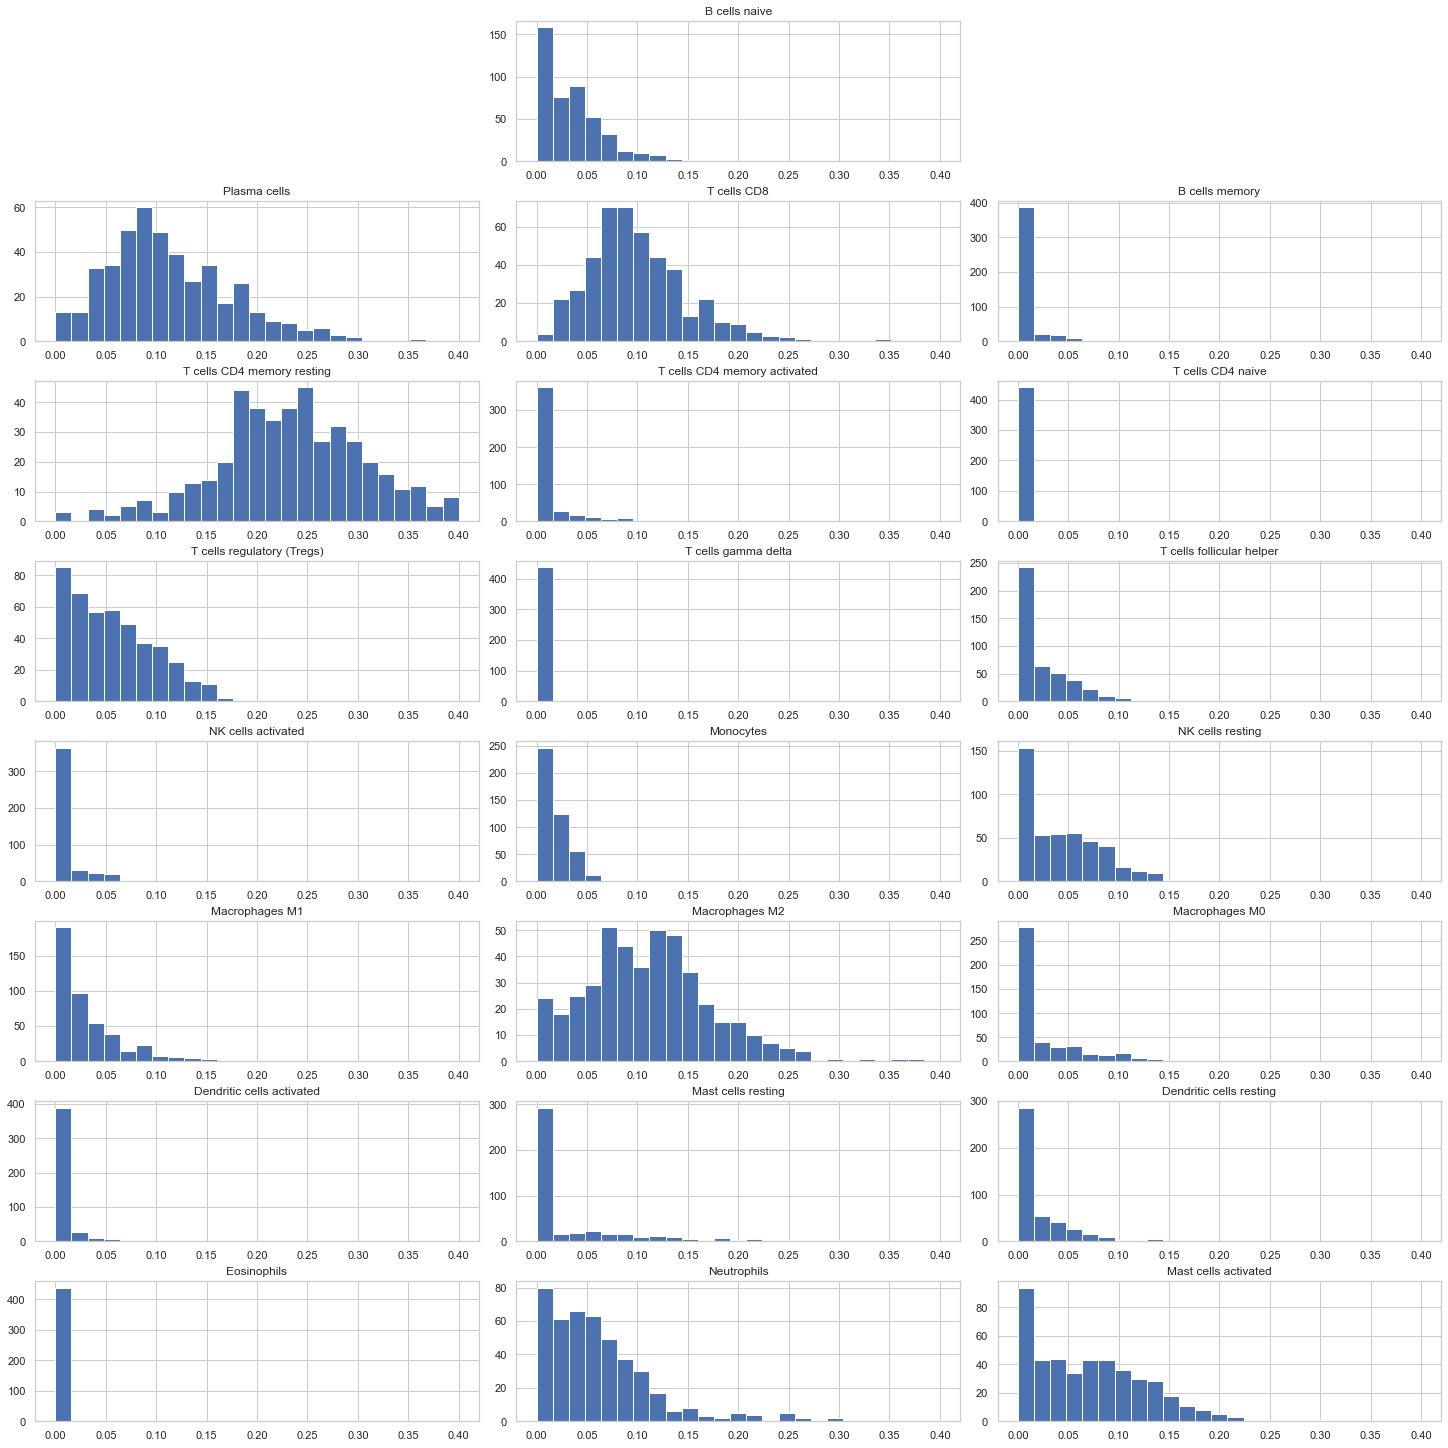

In [43]:
fig = plt.figure(constrained_layout=True, figsize =(20, 20))

gs = GridSpec(ncols=3, nrows=8, figure=fig)

for i in range(1,23):
    ax = fig.add_subplot(gs[round(i/3),i%3])
    ax.hist(immune_clinical.iloc[:, i], bins = 25, range=(0,0.4))
    ax.title.set_text(immune_clinical.iloc[:,i].name);

### Boxplots of immune cells

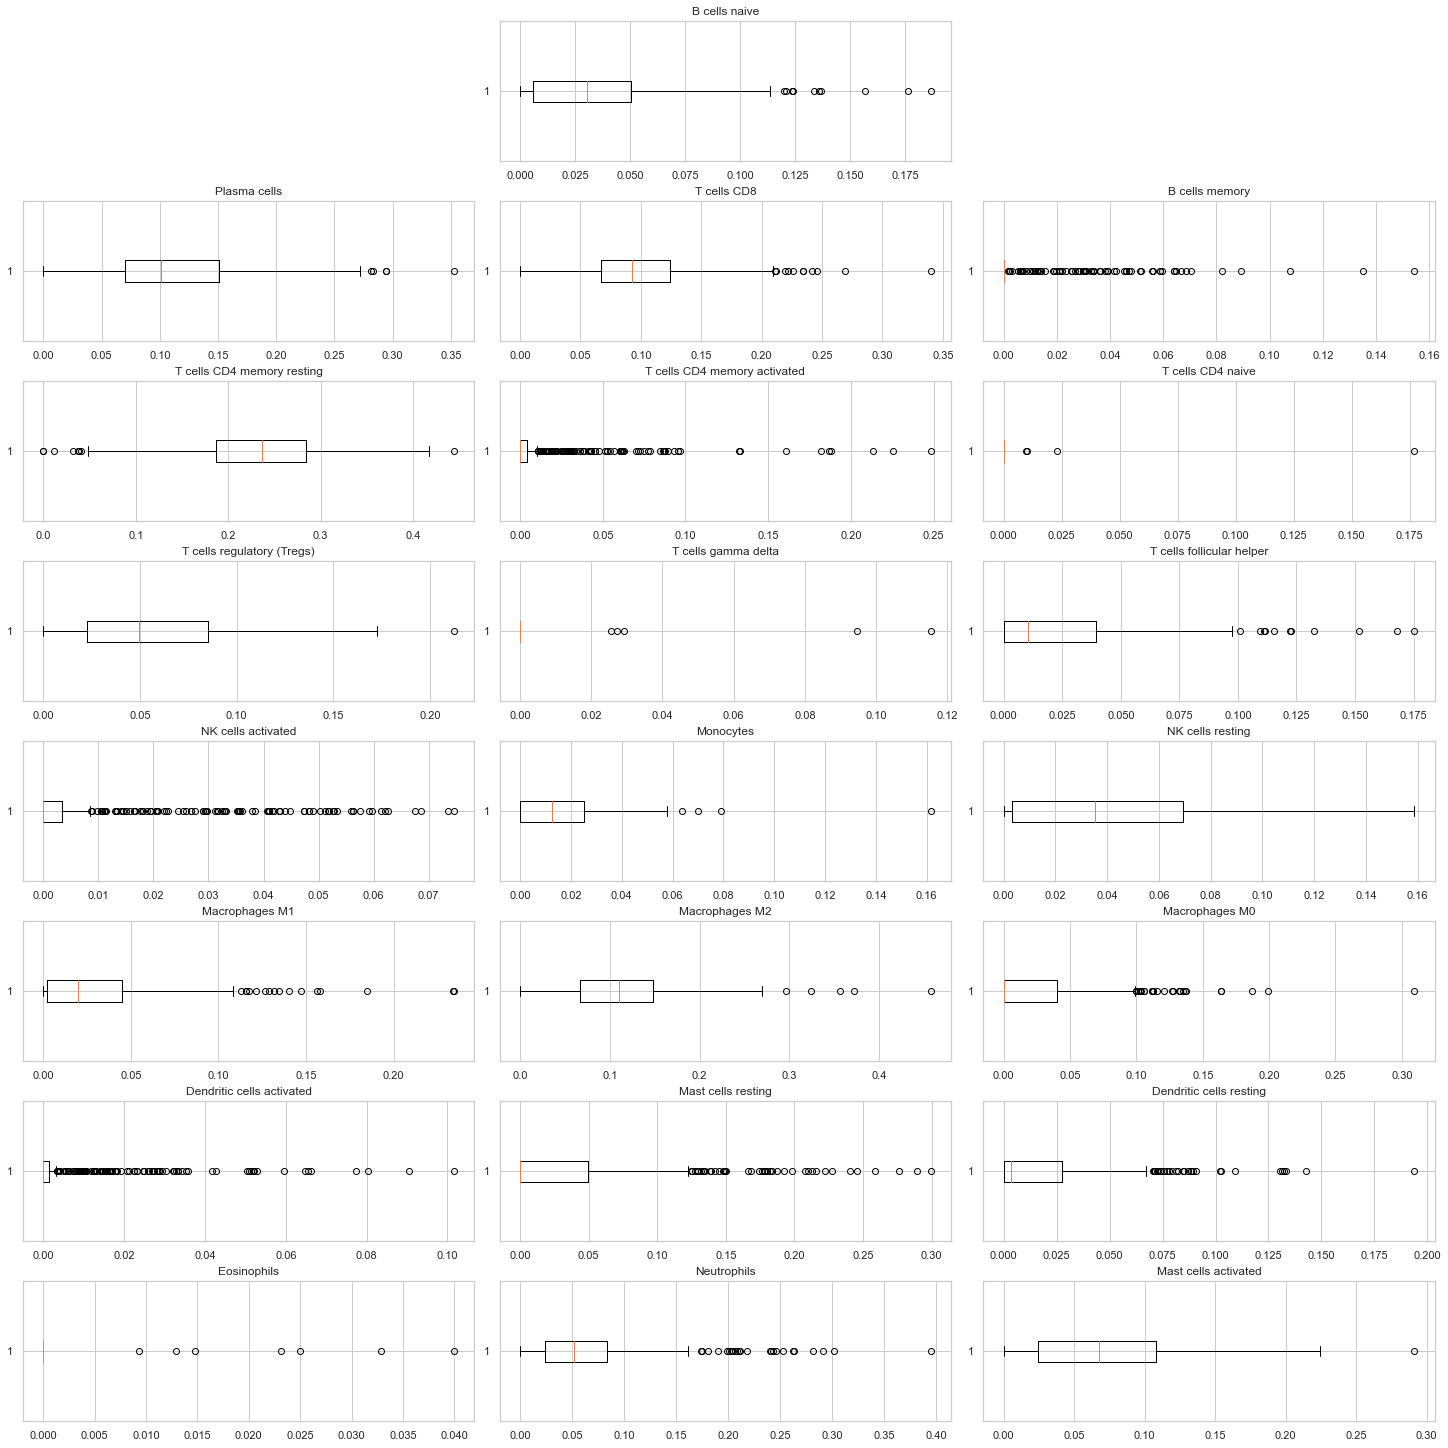

In [44]:
fig = plt.figure(constrained_layout=True,figsize =(20, 20))

gs = GridSpec(ncols=3, nrows=8, figure=fig)

for i in range(1,23):
    ax = fig.add_subplot(gs[round(i/3),i%3])
    ax.boxplot(x = immune_clinical.iloc[:, i], vert=False)
    ax.title.set_text(immune_clinical.iloc[:,i].name);

### Scatter plots of different immune cells against each other

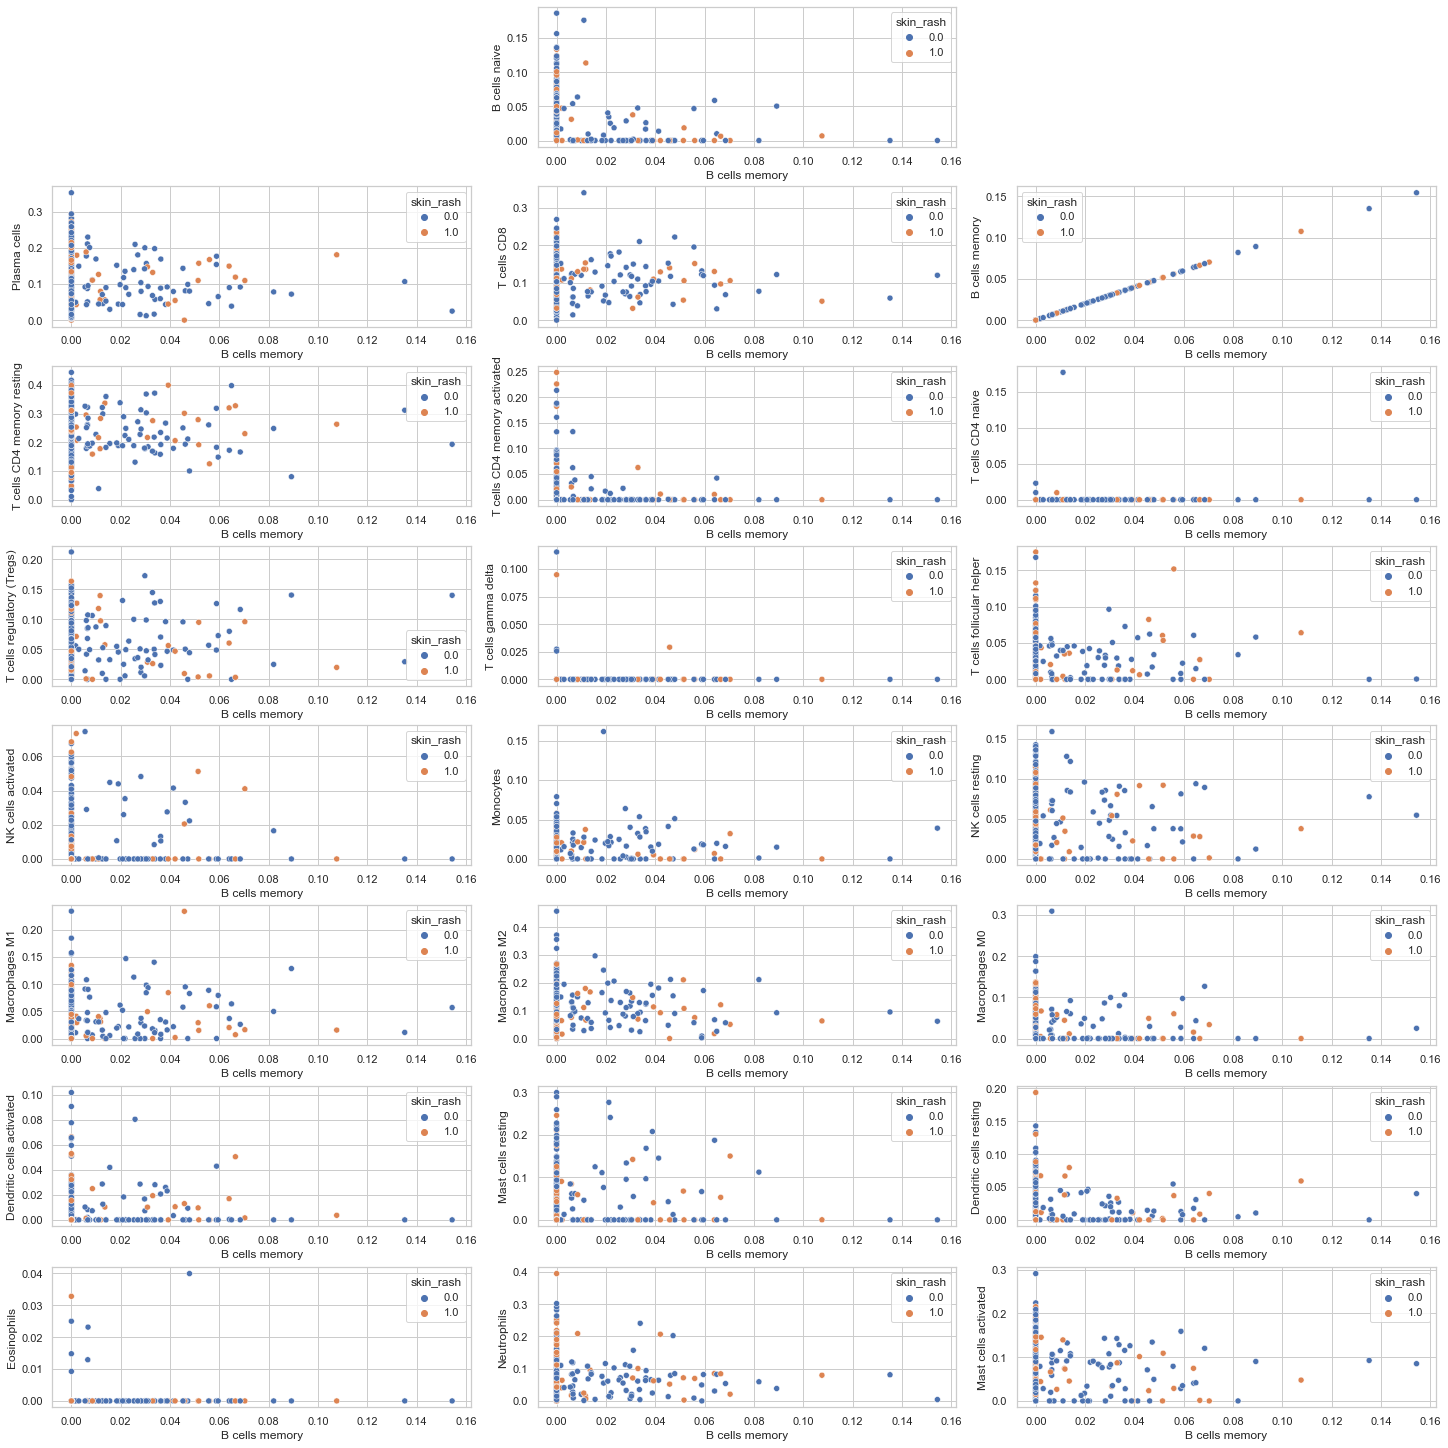

In [45]:
import seaborn as sns
from matplotlib.gridspec import GridSpec

#sns.scatterplot(data=cdf, x=cdf.iloc[:,1], y=cdf.iloc[:,20],hue="skin_rash")

fig = plt.figure(constrained_layout=True,figsize =(20, 20))

gs = GridSpec(ncols=3, nrows=8, figure=fig)

cell_on_xaxis = 2

for i in range(1,23):
    #ax = fig.add_subplot(gs[round(i/3),i%3])
    sns.scatterplot(data=immune_clinical, x=immune_clinical.iloc[:,cell_on_xaxis], y=immune_clinical.iloc[:,i],hue="skin_rash",\
                    ax=fig.add_subplot(gs[round(i/3),i%3]))
    ax.title.set_text(immune_clinical.iloc[:,i].name);

## check for multicolinearity??

In [12]:
!pip install statsmodels

You should consider upgrading via the '/Users/heikemodest/.pyenv/versions/3.8.12/envs/health/bin/python -m pip install --upgrade pip' command.


In [53]:
immune_clinical.values[:,1].shape

(442,)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# compute VIF factor for feature index 0
vif(immune_clinical.values,1)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Dimensionality reduction

## Scaling: from X to X_scaled NECESSARY???

In [16]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=features)
X_scaled

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,1.025411,-0.343705,-0.229827,-0.591112,-0.096223,-0.859374,-0.402126,-0.757977,0.344682,9.142768,...,-0.890156,-0.348337,0.737241,-1.478405,1.842501,-0.434860,-0.603625,2.160106,-0.108081,0.124270
1,-1.053443,-0.343705,-0.105382,-0.725687,-0.096223,0.199197,1.473281,0.269138,0.744993,-0.107140,...,1.241060,-0.677736,-0.831666,-0.695575,-0.672868,0.219551,-0.603625,1.186733,-0.108081,0.045752
2,0.977627,-0.343705,0.110279,0.273048,-0.096223,0.614112,-0.402126,-0.833935,0.381390,-0.107140,...,-0.890156,-0.457505,2.239021,-1.723741,0.204537,-0.434860,-0.603625,0.336452,11.417388,-0.270593
3,-0.737874,-0.343705,1.202641,2.089801,-0.096223,0.635537,-0.402126,-0.833935,2.120576,-0.107140,...,-0.383587,-0.677736,-0.368023,-1.562723,-0.672868,-0.434860,-0.603625,0.247283,-0.108081,-1.045238
4,-1.053443,0.476041,-0.892163,-0.407410,-0.096223,1.341637,-0.402126,0.290390,0.103924,-0.107140,...,-0.890156,-0.371260,-0.831666,1.038779,2.142076,0.289883,-0.603625,-0.395062,-0.108081,0.472811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-1.053443,-0.343705,1.667144,-0.671935,-0.096223,0.076214,-0.402126,-0.833935,-0.862800,-0.107140,...,-0.734048,0.119230,-0.831666,0.332226,-0.672868,0.644736,0.146232,0.106481,-0.108081,0.729244
214,0.262458,-0.343705,0.768996,-0.233877,-0.096223,-1.828033,-0.402126,1.170764,-0.491197,-0.107140,...,0.989127,0.899749,0.294801,-1.812747,-0.232003,-0.434860,-0.603625,0.884432,-0.108081,1.376206
215,0.885398,-0.343705,0.876434,0.284845,-0.096223,0.107505,-0.402126,-0.833935,-0.880933,-0.107140,...,-0.233244,0.035901,-0.831666,-0.329423,2.451301,-0.434860,-0.603625,1.228922,-0.108081,-0.366821
216,0.880543,-0.343705,-0.065522,-0.541167,-0.096223,-0.599022,-0.402126,-0.028699,-0.435760,-0.107140,...,-0.779839,-0.677736,-0.831666,3.709403,-0.672868,0.847187,0.782719,-0.672729,-0.108081,-0.421443


<AxesSubplot:>

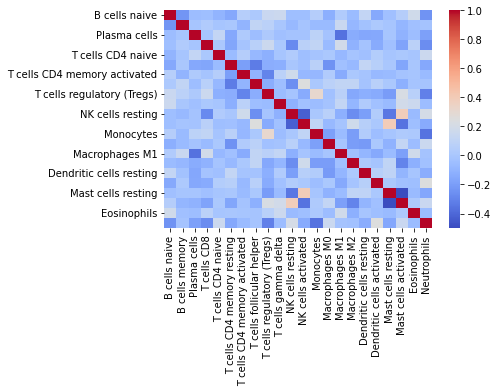

In [17]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

## PCA >>> X_proj

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [56]:
W = pca.components_
len(W)

10

In [57]:
W = pd.DataFrame(W.T,
                 index=features,
                 columns=[f'PC{i}' for i in range(1,len(W)+1)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
B cells naive,0.037362,0.036551,-0.067856,-0.146493,-0.032940,0.203951,0.057765,0.144150,-0.371627,0.338683
B cells memory,-0.006159,0.003772,-0.005947,-0.016096,0.034255,-0.056408,-0.034275,0.024864,-0.002235,0.002607
Plasma cells,0.118054,0.255690,-0.592609,0.590717,-0.163883,-0.247481,-0.115893,0.048941,-0.074681,0.074382
T cells CD8,0.019227,0.170612,-0.151269,-0.348605,0.183318,-0.457874,0.217409,-0.585348,0.136371,-0.171065
T cells CD4 naive,0.000953,0.000097,0.000393,0.002806,0.000321,-0.001428,0.000639,-0.002512,-0.000384,-0.001377
T cells CD4 memory resting,-0.767433,-0.520490,-0.118182,0.111144,-0.058992,-0.100919,0.009897,-0.009732,0.103934,0.012999
T cells CD4 memory activated,0.082028,0.059838,0.008399,0.083906,-0.080920,0.179499,0.750670,0.027919,-0.096331,-0.200822
T cells follicular helper,0.072559,0.136707,0.079556,-0.071892,0.024000,-0.090236,-0.029742,0.102420,0.223308,0.558482
T cells regulatory (Tregs),0.099477,-0.032135,-0.260796,-0.356101,-0.059211,-0.001982,-0.470845,0.113922,-0.162985,-0.410022
T cells gamma delta,0.017101,-0.002449,-0.004560,-0.019462,0.005528,0.022053,0.023003,-0.007730,-0.014267,0.053291


In [58]:
X_proj = pca.transform(X)
X_proj.shape
X_proj = pd.DataFrame(X_proj, columns=[f'PC{b}' for b in range(1, len(W.columns)+1)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.109715,-0.066345,-0.030776,-0.046746,0.036490,0.054266,-0.023220,-0.022198,-0.029104,0.068963
1,0.039776,-0.079776,-0.032079,0.011007,-0.018903,0.040429,0.025277,-0.012237,-0.006338,-0.022716
2,-0.014447,-0.072439,-0.064502,-0.046438,0.065787,-0.035751,0.003806,0.029217,-0.050724,0.031056
3,-0.008360,-0.038138,-0.170202,-0.035059,0.028046,-0.057701,-0.014610,-0.045063,-0.008751,-0.051701
4,-0.096199,-0.057589,0.062866,-0.001579,-0.058028,-0.023403,-0.017531,-0.028306,0.024403,0.016370
...,...,...,...,...,...,...,...,...,...,...
213,0.013518,0.003560,-0.018819,0.124965,-0.028627,-0.016642,-0.024852,-0.006703,0.006961,-0.018158
214,0.192932,-0.021176,-0.010329,0.052738,0.080656,-0.012475,-0.002132,0.021460,-0.021807,0.031819
215,0.019438,-0.027049,-0.062971,0.019571,-0.026979,0.015490,0.005908,-0.053823,0.018452,0.066583
216,-0.040492,0.140843,0.095934,0.000507,-0.152685,0.032372,-0.039321,-0.007608,0.007150,-0.011856


### explained variance ratio

In [22]:
X_proj.std()**2 / ((X.std()**2).sum())

PC1     0.186762
PC2     0.160063
PC3     0.132844
PC4     0.103691
PC5     0.082669
PC6     0.062870
PC7     0.055382
PC8     0.039034
PC9     0.035733
PC10    0.033412
dtype: float64

In [23]:
pca.explained_variance_ratio_

array([0.18676185, 0.16006324, 0.13284362, 0.10369112, 0.08266878,
       0.06286986, 0.05538225, 0.03903397, 0.03573284, 0.03341249])

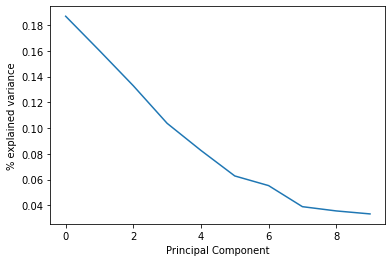

In [24]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

<AxesSubplot:>

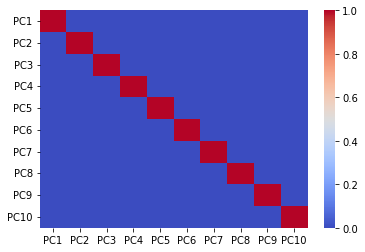

In [25]:
sns.heatmap(pd.DataFrame(X_proj).corr(), cmap='coolwarm')

RESULT: 10 PCs seems to be good (results taken from the elbow method)

## t-SNE >>> X_embedded

In [59]:
from sklearn.manifold import TSNE

In [89]:
tsne = TSNE(n_components=3, random_state=0, perplexity=10.0,learning_rate="auto")

In [90]:
X_embedded = tsne.fit_transform(X)

/Users/heikemodest/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [91]:
X_embedded = pd.DataFrame(X_proj_tsne, columns=[f'tsne{b}' for b in range(1, 3+1)])
X_embedded

,tsne1,tsne2,tsne3
0,-1.203276,-13.639761,16.363361
1,6.083069,14.302861,12.928523
2,-8.838243,19.081406,3.735891
3,18.528381,5.777464,12.093998
4,16.730734,-15.504483,-11.777496
...,...,...,...
213,8.267453,7.226325,-6.669921
214,-5.196432,3.436831,27.523760
215,14.914669,0.589649,3.001431
216,-7.106364,-13.919899,-5.683191


## isomap, umap

## 2d plots before and after projection

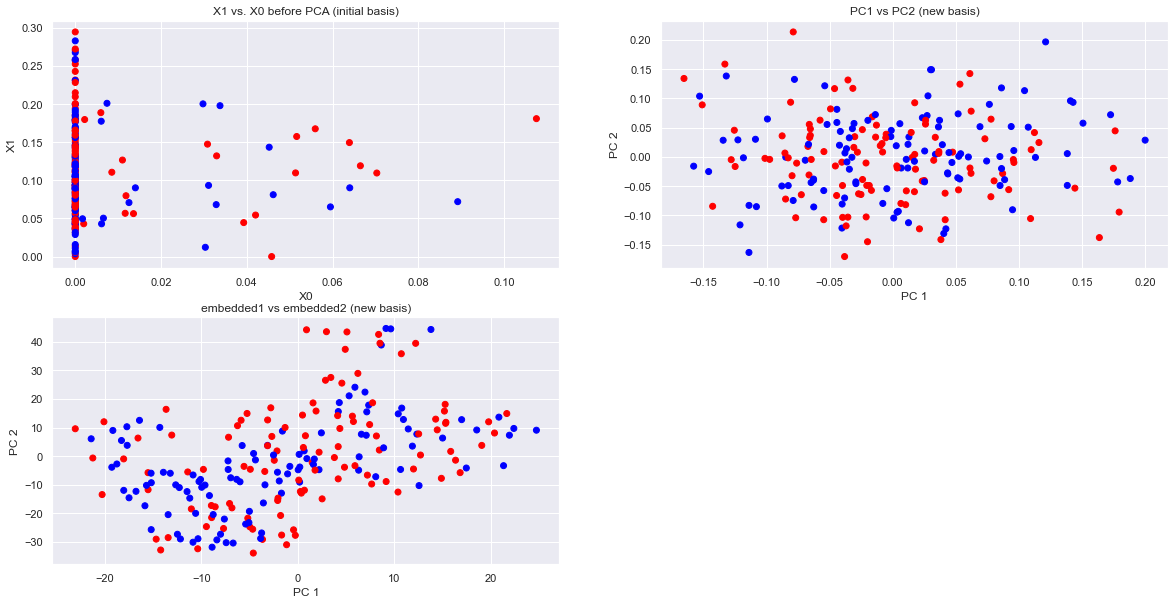

In [135]:
dim1 = 1
dim2 = 2
import matplotlib.pyplot as plt
colors = {1.0:'red', 0.0:'blue'}
            
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('X1 vs. X0 before PCA (initial basis)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,dim1], X.iloc[:,dim2],c=cetux['skin_rash'].map(colors))

plt.subplot(2,2,2)
plt.title('PC1 vs PC2 (new basis)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,dim1], X_proj.iloc[:,dim2],c=cetux['skin_rash'].map(colors));

plt.subplot(2,2,3)
plt.title('embedded1 vs embedded2 (new basis)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_embedded.iloc[:,dim1], X_embedded.iloc[:,dim2],c=cetux['skin_rash'].map(colors));

# Start with clustering analysis

## KMeans clustering

In [42]:
km = KMeans(n_clusters=5)

In [43]:
km.fit(X)

KMeans(n_clusters=5)

In [45]:
km.cluster_centers_.shape

(5, 22)

In [135]:
type(km.labels_)
#km.labels_[90,]
km.labels_

array([0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 4, 2, 1, 3, 3, 4, 4, 1, 0, 4, 3, 4,
       4, 3, 4, 0, 3, 0, 0, 0, 3, 4, 2, 0, 2, 0, 3, 4, 3, 3, 0, 0, 4, 3,
       3, 4, 4, 0, 3, 2, 0, 0, 0, 4, 3, 1, 2, 1, 3, 4, 2, 4, 0, 0, 4, 2,
       4, 2, 4, 4, 1, 4, 3, 0, 0, 0, 0, 3, 3, 3, 2, 1, 4, 0, 3, 3, 4, 0,
       1, 2, 1, 1, 0, 0, 4, 0, 4, 4, 0, 4, 4, 2, 2, 0, 2, 0, 4, 1, 3, 3,
       3, 2, 1, 4, 0, 3, 3, 4, 4, 0, 0, 0, 4, 0, 4, 2, 1, 4, 0, 4, 4, 4,
       4, 3, 4, 1, 3, 1, 0, 0, 3, 0, 3, 2, 0, 3, 4, 0, 4, 2, 1, 0, 0, 1,
       3, 4, 4, 4, 3, 2, 4, 2, 0, 1, 1, 4, 4, 2, 3, 4, 4, 0, 0, 2, 0, 3,
       2, 3, 1, 0, 0, 1, 4, 3, 3, 1, 1, 4, 3, 3, 1, 4, 4, 2, 0, 3, 4, 2,
       3, 4, 4, 0, 2, 3, 0, 4, 3, 2, 2, 3, 2, 3, 4, 0, 1, 0, 4, 0],
      dtype=int32)

### make new cluster-labels list 

In [239]:
clust = 4
# gives the indeces of the chosen cluster label "clust"
mask = np.where(km.labels_ == clust)
list(mask)[0]
new_labels = [0.] * 218
new_labels[list(mask)[0]] = 1.0


TypeError: only integer scalar arrays can be converted to a scalar index

In [226]:
(target[mask[0]] == 0).sum()

37

In [227]:
km_cm = confusion_matrix(target[list(mask)[0]], km.labels_)
ConfusionMatrixDisplay(km_cm).plot()

ValueError: Found input variables with inconsistent numbers of samples: [60, 218]

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set_style("whitegrid")
sns.scatterplot(data=X, x=X.iloc[:,2], y=X.iloc[:,18],size=y,\
                style=target,c=km.labels_,sizes=(80,20));

NameError: name 'sns' is not defined

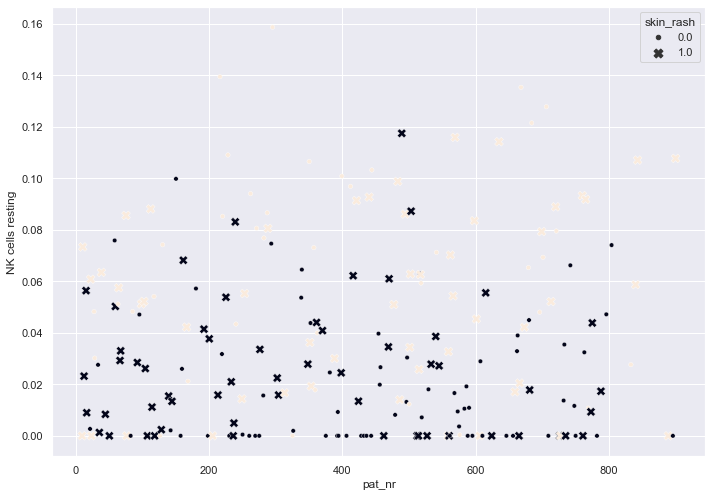

In [142]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=cetux, x=cetux.iloc[:,0], y=cetux.iloc[:,11],\
                size=cetux["skin_rash"],style=cetux["skin_rash"],c=km.labels_,sizes=(80,20));

In [107]:
X_embedded.shape

(218, 3)

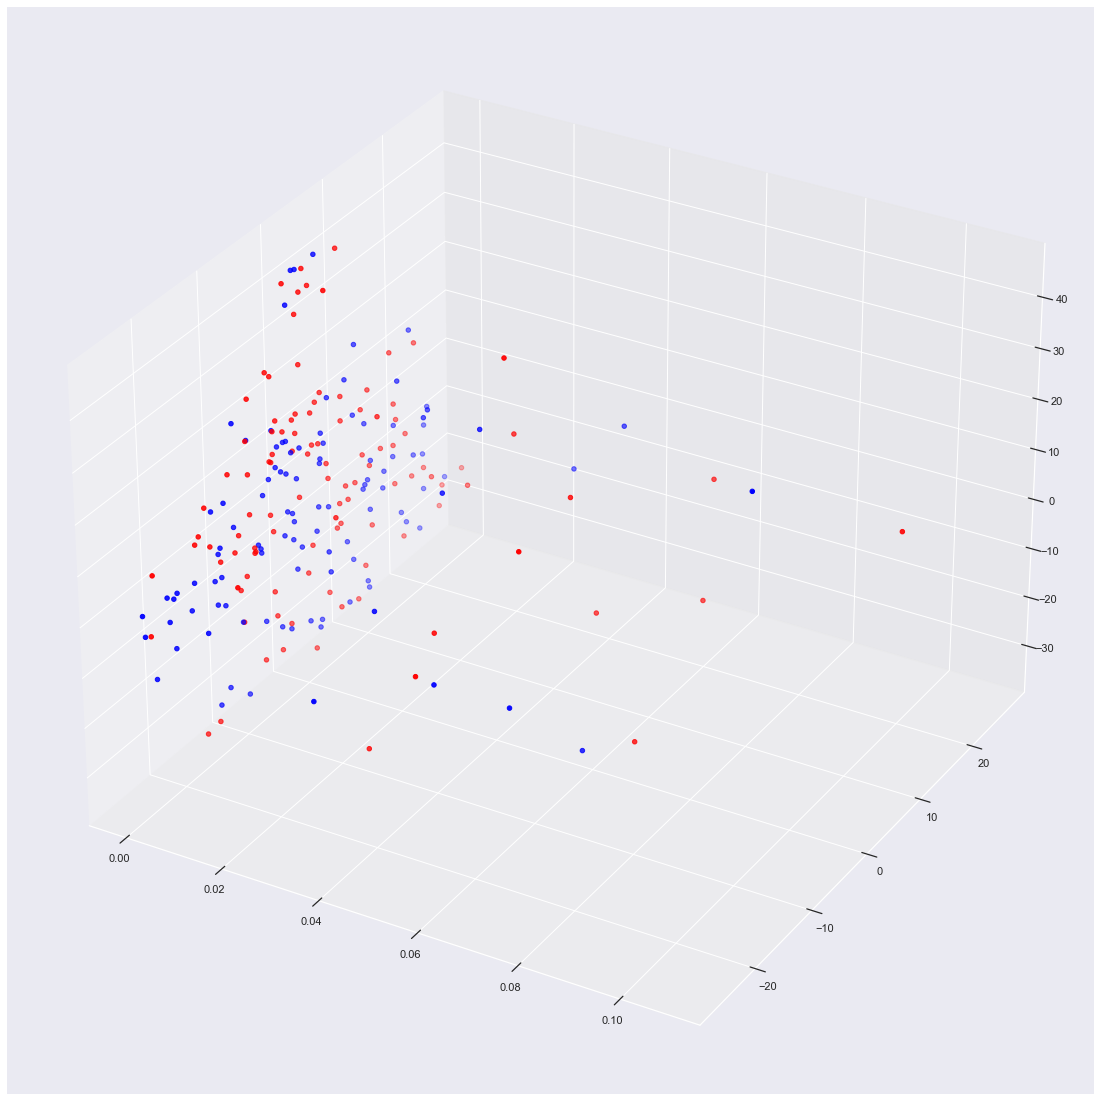

In [144]:
cell_1 = 1
cell_2 = 0
cell_3 = 2
fig = plt.figure(figsize =(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,cell_1], X_embedded.iloc[:,cell_2], X_embedded.iloc[:,cell_3],c=cetux['skin_rash'].map(colors));

In [ ]:
km = KMeans(n_clusters=2)
km.fit(X_proj)


In [ ]:
km.cluster_centers_.shape


In [ ]:
cell_1 = 0
cell_2 = 9
colors = {1.0:'red', 0.0:'blue'}
            
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('true colors'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,cell_1], X_proj.iloc[:,cell_2],c=cetux['skin_rash'].map(colors));

plt.subplot(1,2,2)
plt.title('kmeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,cell_1], X_proj.iloc[:,cell_2],c=clustering.labels_);

In [ ]:
cell_1 = 0
cell_2 = 8
cell_3 = 7
fig = plt.figure(figsize =(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,cell_1], X.iloc[:,cell_2], X.iloc[:,cell_3],c=clustering.labels_);

## DBSCAN ??

In [146]:
from sklearn.cluster import ward_tree
wt = ward_tree(X,n_clusters=20)

/var/folders/mq/jjlkgbq54s7gdf9qc0n74wqr0000gp/T/ipykernel_94066/2346115448.py:2: UserWarning: Partial build of the tree is implemented only for structured clustering (i.e. with explicit connectivity). The algorithm will build the full tree and only retain the lower branches required for the specified number of clusters
  wt = ward_tree(X,n_clusters=20)


In [147]:
wt


(array([[  5, 127],
        [164, 213],
        [ 70, 153],
        [ 87, 123],
        [184, 188],
        [ 10, 172],
        [110, 166],
        [103, 114],
        [ 44, 136],
        [ 16, 117],
        [ 54, 189],
        [ 63, 121],
        [162, 180],
        [ 15,  77],
        [ 88,  91],
        [ 40, 175],
        [ 28, 100],
        [ 18, 151],
        [ 26, 116],
        [ 72, 102],
        [150, 163],
        [ 42, 177],
        [ 41, 182],
        [ 69, 101],
        [  1,  76],
        [171, 204],
        [ 71, 227],
        [ 96, 160],
        [211, 219],
        [ 95, 139],
        [ 14,  23],
        [ 97, 200],
        [208, 210],
        [ 62, 119],
        [145, 195],
        [130, 147],
        [ 46, 113],
        [220, 238],
        [120, 183],
        [ 56, 176],
        [168, 209],
        [  3,  47],
        [ 33, 138],
        [105, 251],
        [132, 237],
        [118, 155],
        [157, 199],
        [ 51, 230],
        [  4, 158],
        [ 83, 247],


In [148]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [149]:
len(clustering.labels_)

218

## Spectral clustering

In [159]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2, assign_labels='discretize',random_state=0).fit(X)
clustering.labels_

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0])

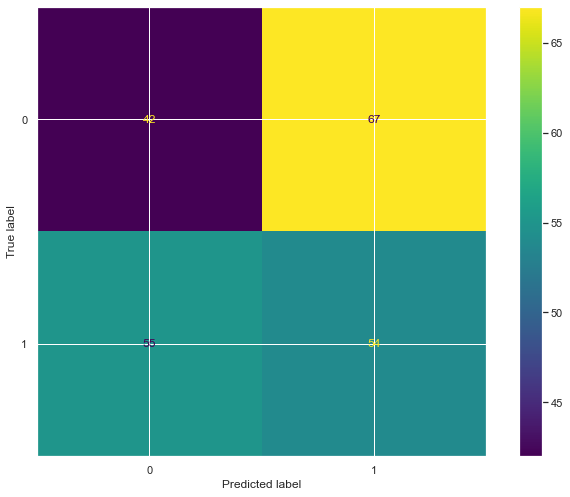

In [162]:
cm = confusion_matrix(cetux['skin_rash'], clustering.labels_)
ConfusionMatrixDisplay(cm).plot()

## Gaussian mixture model

In [151]:
from sklearn.mixture import GaussianMixture

In [152]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

In [154]:
len(gm.means_)

2

In [155]:
gm.predict([[0, 0], [12, 3]])

/Users/heikemodest/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but GaussianMixture is expecting 22 features as input.

## Agglomerative hierarchical clustering

In [209]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage="average").fit(X)#‘complete’, ‘average’, ‘single’

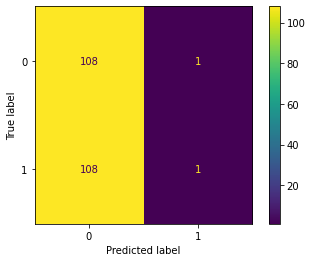

In [210]:
agg_cm = confusion_matrix(cetux['skin_rash'], agg_clustering.labels_)
ConfusionMatrixDisplay(agg_cm).plot()

In [211]:
(agg_clustering.labels_ == 1).sum()

2